In [2]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pathOfTheYeastTrackAnalysisFolder = '/Users/Yidi/Desktop/YeastTrackAnalysis-master/'
pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

# input data

In [3]:
################
# THESE ARE THE ONLY PARAMETERS TO CHANGE



path = "/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun_speed/yidi_new_data_for_joh/"

path_to_folder_with_filenames = path+"08132018 for Joh/abp1gfp and fim1gfp 110msec 07232018/budding yeast abp1gfp/"


# change your filename to the file you want to analyze
path_to_all_tracks_data = path+"/08132018 for Joh/abp1gfp and fim1gfp 110msec 07232018/"
file = 'all tracks.csv'

# 
frameToSecondConversion = 0.137
pixelToNanometerConversion = 65

excludeTheFirstNFrames = 5

################


outputpath = path_to_all_tracks_data

# Get all the good fileIDs from the folder

In [5]:


from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_to_folder_with_filenames) if isfile(join(path_to_folder_with_filenames, f))]
#print(onlyfiles)


goodTrajectoryIDs = []
for filename in onlyfiles:
    if (filename != '.DS_Store'):
        number = int((filename.replace('[Trajectory number ','')).replace('].tif',''))
        print(filename,",",number)
        goodTrajectoryIDs.append(number)
print(goodTrajectoryIDs)   

[Trajectory number 1558].tif , 1558
[Trajectory number 772].tif , 772
[Trajectory number 590].tif , 590
[Trajectory number 2400].tif , 2400
[Trajectory number 2206].tif , 2206
[Trajectory number 548].tif , 548
[Trajectory number 1518].tif , 1518
[Trajectory number 1522].tif , 1522
[Trajectory number 533].tif , 533
[Trajectory number 1084].tif , 1084
[Trajectory number 447].tif , 447
[Trajectory number 164].tif , 164
[Trajectory number 2277].tif , 2277
[Trajectory number 718].tif , 718
[Trajectory number 780].tif , 780
[Trajectory number 893].tif , 893
[Trajectory number 1894].tif , 1894
[Trajectory number 1507].tif , 1507
[Trajectory number 994].tif , 994
[Trajectory number 1767].tif , 1767
[Trajectory number 223].tif , 223
[Trajectory number 1232].tif , 1232
[Trajectory number 1766].tif , 1766
[Trajectory number 444].tif , 444
[Trajectory number 405].tif , 405
[Trajectory number 662].tif , 662
[Trajectory number 623].tif , 623
[Trajectory number 988].tif , 988
[Trajectory number 2317]

# read data

In [8]:
alldata = pd.read_csv(path_to_all_tracks_data+file)
alldata[0:5]

,,Trajectory,Frame,x,y,z,m0,m1,m2,m3,m4,NPscore
0,1,1,0,749.93463,14.50130,0,6.04244,2.23985,6.11717,18.71667,62.14309,0.00501
1,2,1,1,750.13904,14.80274,0,6.23375,2.19954,5.91302,17.78586,57.91466,0.00516
2,3,1,2,749.97839,15.16021,0,6.34022,2.30812,6.50601,20.58775,70.81566,0.00915
3,4,1,3,750.13501,14.95119,0,6.21997,2.34391,6.74435,21.85797,77.11279,0.00769
4,5,1,4,749.99530,15.20649,0,6.03222,2.24832,6.14033,18.74739,62.03238,0.00564


# do it for multiple tracks at once

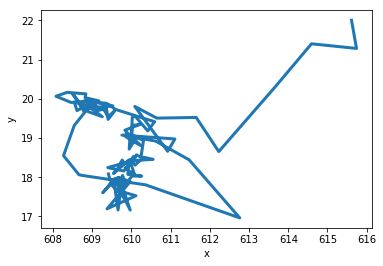

109
            Trajectory  Frame          x         y  z        m0       m1  \
5    61389        1558    277  609.41571  18.08413  0   3.15012  2.22965   
6    61390        1558    278  609.45734  17.92807  0   3.20719  2.06226   
7    61391        1558    279  609.69641  17.98717  0   3.35929  2.31276   
8    61392        1558    280  609.96985  17.16224  0   3.50390  2.33276   
9    61393        1558    281  609.61487  17.87797  0   3.62433  2.08943   
10   61394        1558    282  609.86285  17.79932  0   4.39343  2.09372   
11   61395        1558    283  609.77545  18.04553  0   5.07298  2.20866   
12   61396        1558    284  609.66022  17.16596  0   4.63724  2.09785   
13   61397        1558    285  609.55029  17.93959  0   4.76013  2.25507   
14   61398        1558    286  609.26868  17.60291  0   4.42681  2.28459   
15   61399        1558    287  609.59692  17.96092  0   5.13147  2.14038   
16   61400        1558    288  609.68408  17.70814  0   4.23161  2.33906   
17   614

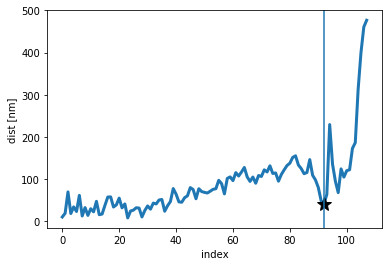

inflectionPoint Frame: 364
inflectionPoint Time[s]: 49.868
inflectionPoint Intensity: 14.73471


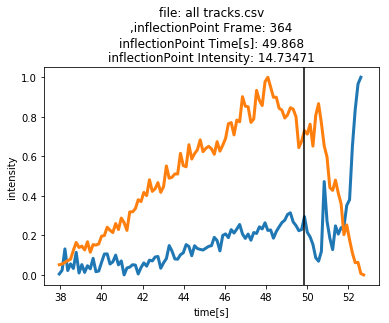

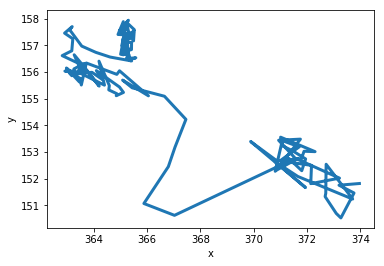

145
            Trajectory  Frame          x          y  z        m0       m1  \
5    35994         772    134  365.04523  157.49841  0   4.49495  1.95679   
6    35995         772    135  365.19931  157.76453  0   3.82106  1.96383   
7    35996         772    136  365.04483  157.46399  0   4.47390  2.11684   
8    35997         772    137  365.29138  157.75299  0   5.48656  2.06072   
9    35998         772    138  365.17862  157.56224  0   5.06929  2.13847   
10   35999         772    139  365.05569  156.99377  0   5.36080  2.07888   
11   36000         772    140  365.52548  157.58632  0   5.73779  2.06935   
12   36001         772    141  365.23053  157.86507  0   5.89824  2.09980   
13   36002         772    142  365.32794  157.42950  0   6.17100  2.04370   
14   36003         772    143  365.49567  157.16832  0   6.42453  2.10993   
15   36004         772    144  365.52069  157.53549  0   7.41015  2.12010   
16   36005         772    145  365.45718  157.47610  0   6.77122  1.9786

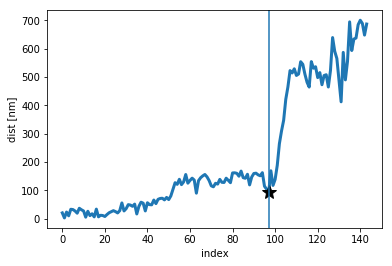

inflectionPoint Frame: 226
inflectionPoint Time[s]: 30.962000000000003
inflectionPoint Intensity: 9.57054


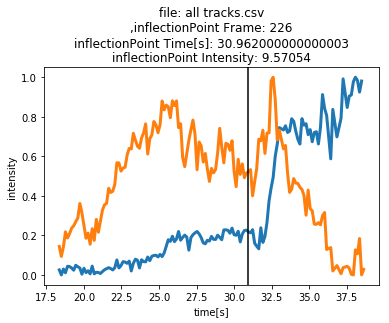

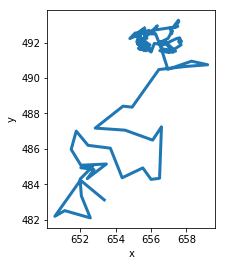

127
            Trajectory  Frame          x          y  z        m0       m1  \
5    28667         590     95  655.62439  492.82605  0   4.74577  2.24263   
6    28668         590     96  655.04010  492.41101  0   4.25605  2.24510   
7    28669         590     97  655.39899  492.25681  0   3.47937  2.15581   
8    28670         590     98  655.94104  491.86658  0   5.43147  2.31816   
9    28671         590     99  655.39545  491.93893  0   5.63329  2.27856   
10   28672         590    100  655.19409  492.03546  0   5.06146  2.32621   
11   28673         590    101  655.35382  491.82602  0   4.83331  2.26949   
12   28674         590    102  655.24194  492.19360  0   5.98766  2.19120   
13   28675         590    103  655.38757  492.42252  0   5.44092  2.14918   
14   28676         590    104  655.50977  491.85226  0   6.02014  2.28646   
15   28677         590    105  655.31268  492.25281  0   6.62606  2.30976   
16   28678         590    106  655.32336  492.00476  0   5.93726  2.2794

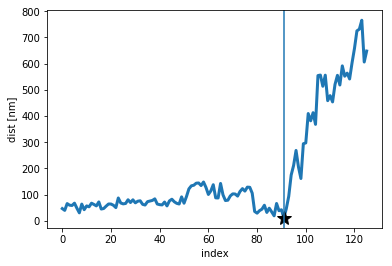

inflectionPoint Frame: 181
inflectionPoint Time[s]: 24.797
inflectionPoint Intensity: 8.48023


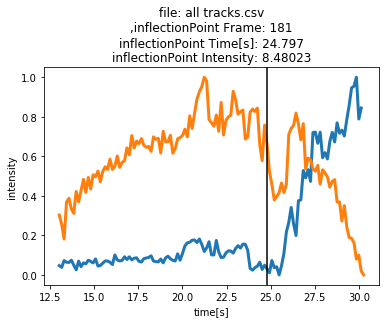

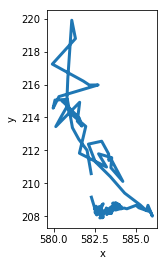

110
            Trajectory  Frame          x          y  z        m0       m1  \
5    85614        2400    412  582.29895  209.16238  0   3.39067  2.08365   
6    85615        2400    413  582.62714  208.08394  0   3.98971  2.34391   
7    85616        2400    414  582.52032  208.23885  0   4.67842  2.21138   
8    85617        2400    415  582.58362  208.61201  0   6.37295  2.08068   
9    85618        2400    416  582.48236  208.47662  0   6.77127  2.13287   
10   85619        2400    417  582.64880  208.38098  0   6.58521  2.00754   
11   85620        2400    418  583.01624  208.76225  0   6.24783  2.42464   
12   85621        2400    419  582.72736  208.12239  0   8.10808  2.08592   
13   85622        2400    420  582.74182  208.57970  0   7.88384  2.11175   
14   85623        2400    421  582.81146  208.26436  0   8.22113  2.05331   
15   85624        2400    422  582.92798  207.99387  0   9.14156  2.26703   
16   85625        2400    423  582.81207  207.90341  0   8.72107  2.2777

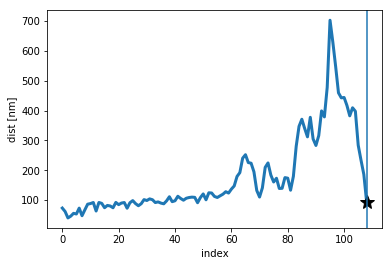

inflectionPoint Frame: 516
inflectionPoint Time[s]: 70.69200000000001
inflectionPoint Intensity: 7.91395


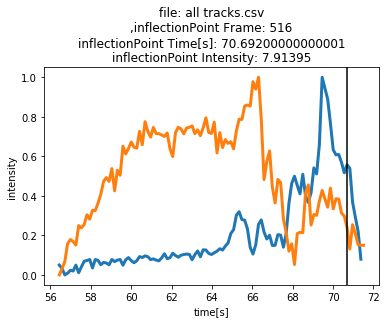

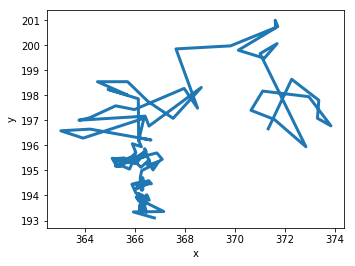

139
            Trajectory  Frame          x          y  z        m0       m1  \
5    80984        2206    382  366.78464  193.10469  0   3.30576  2.07432   
6    80985        2206    383  365.94498  193.34337  0   4.80225  2.30406   
7    80986        2206    384  367.15872  193.35997  0   3.65769  2.18556   
8    80987        2206    385  366.41122  193.73097  0   3.63674  2.21212   
9    80988        2206    386  366.29666  193.51463  0   4.77970  2.11461   
10   80989        2206    387  366.28391  194.02734  0   5.64227  2.14557   
11   80990        2206    388  366.31549  193.81529  0   6.09286  2.22182   
12   80991        2206    389  366.25424  193.58734  0   5.72262  2.16883   
13   80992        2206    390  366.18582  193.33995  0   5.95098  2.09759   
14   80993        2206    391  366.19217  193.61067  0   5.70962  2.19501   
15   80994        2206    392  366.43185  193.36279  0   6.00919  2.15641   
16   80995        2206    393  366.38110  193.50153  0   8.09947  2.2114

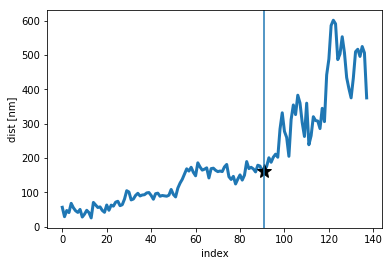

inflectionPoint Frame: 468
inflectionPoint Time[s]: 64.116
inflectionPoint Intensity: 15.552370000000002


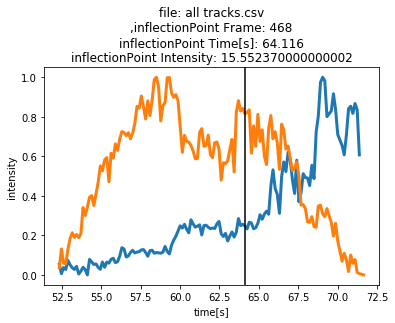

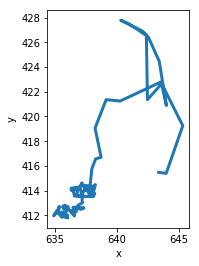

136
            Trajectory  Frame          x          y  z        m0       m1  \
5    27553         548     85  635.45221  412.09924  0   3.87628  2.06586   
6    27554         548     86  635.29486  412.27545  0   4.41108  2.14153   
7    27555         548     87  635.18024  412.30515  0   4.25420  2.03283   
8    27556         548     88  635.34937  412.73535  0   4.96921  2.41648   
9    27557         548     89  635.29767  412.38156  0   6.08165  2.17692   
10   27558         548     90  634.89264  411.97708  0   6.12433  2.25074   
11   27559         548     91  635.13031  412.36273  0   6.93916  2.25545   
12   27560         548     92  635.29413  412.34973  0   7.21692  2.11406   
13   27561         548     93  635.21136  412.23755  0   7.95689  2.18015   
14   27562         548     94  635.59369  411.84900  0   7.70140  2.14469   
15   27563         548     95  635.38586  412.14368  0   8.39244  2.11210   
16   27564         548     96  635.64771  412.29691  0   8.32448  2.1954

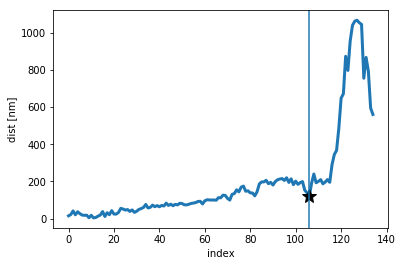

inflectionPoint Frame: 186
inflectionPoint Time[s]: 25.482000000000003
inflectionPoint Intensity: 16.67523


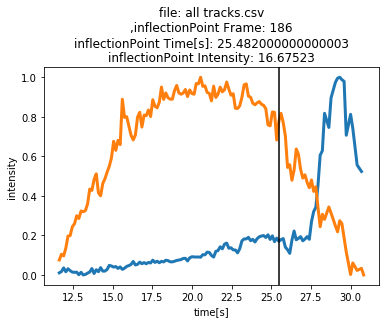

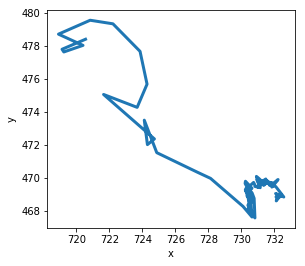

115
            Trajectory  Frame          x          y  z        m0       m1  \
5    59853        1518    269  732.18500  468.82147  0   4.66805  2.24625   
6    59854        1518    270  732.12427  468.60681  0   4.88761  2.23760   
7    59855        1518    271  732.43280  469.00403  0   6.03261  2.25528   
8    59856        1518    272  732.10931  468.84924  0   6.03950  2.06511   
9    59857        1518    273  732.36597  468.86111  0   5.81633  2.12313   
10   59858        1518    274  732.08441  469.05307  0   7.09102  2.20979   
11   59859        1518    275  732.23248  468.99600  0   6.37124  2.25133   
12   59860        1518    276  732.58270  468.84213  0   7.26749  2.19551   
13   59861        1518    277  732.08862  469.48358  0   8.64415  2.26129   
14   59862        1518    278  731.71423  469.55844  0   9.64055  2.07670   
15   59863        1518    279  732.01868  469.62741  0  10.08785  2.18083   
16   59864        1518    280  732.23523  469.90225  0   9.59505  2.1563

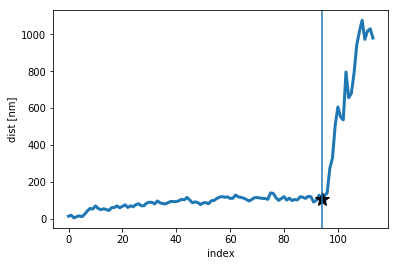

inflectionPoint Frame: 358
inflectionPoint Time[s]: 49.04600000000001
inflectionPoint Intensity: 15.894829999999999


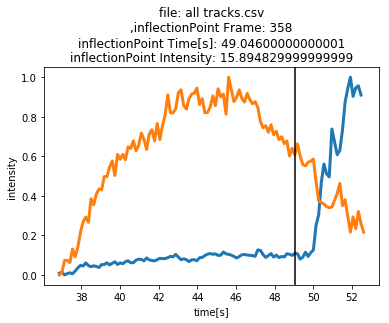

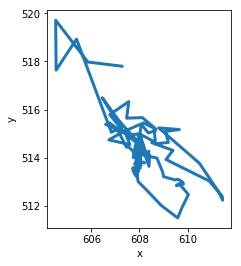

125
            Trajectory  Frame          x          y  z        m0       m1  \
5    59989        1522    270  608.41498  514.09662  0   2.84424  2.23716   
6    59990        1522    271  608.39539  513.63873  0   3.50965  2.17491   
7    59991        1522    272  608.19574  514.21863  0   4.03308  2.12035   
8    59992        1522    273  608.24457  514.09625  0   4.41871  2.21299   
9    59993        1522    274  608.38861  514.27075  0   5.42775  2.44607   
10   59994        1522    275  608.35370  513.92798  0   6.08066  2.33788   
11   59995        1522    276  608.15662  514.53241  0   6.45598  2.18636   
12   59996        1522    277  608.01331  514.41589  0   6.31512  2.25467   
13   59997        1522    278  608.12073  514.49658  0   6.73909  2.18807   
14   59998        1522    279  608.12878  514.59656  0   7.20787  2.11207   
15   59999        1522    280  608.02869  514.99670  0   6.70172  2.35102   
16   60000        1522    281  607.86151  514.50049  0   7.10134  2.3016

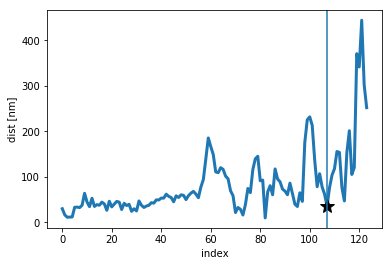

inflectionPoint Frame: 372
inflectionPoint Time[s]: 50.964000000000006
inflectionPoint Intensity: 14.99779


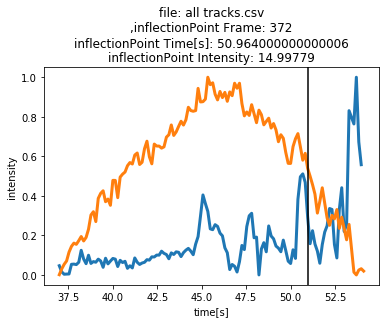

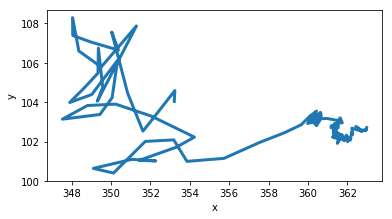

131
            Trajectory  Frame          x          y  z        m0       m1  \
5    27018         533     83  362.92111  102.57340  0   5.76768  2.25636   
6    27019         533     84  362.97897  102.72885  0   5.78893  2.20579   
7    27020         533     85  362.95386  102.59365  0   6.46033  2.24331   
8    27021         533     86  362.69760  102.58450  0   6.67224  2.18293   
9    27022         533     87  362.42377  102.76617  0   6.83966  2.24038   
10   27023         533     88  362.74371  102.51984  0   6.75874  2.19266   
11   27024         533     89  362.22272  102.68543  0   7.36242  2.24482   
12   27025         533     90  362.26697  102.36337  0   7.16157  2.10437   
13   27026         533     91  362.21097  102.48147  0   7.25719  2.20567   
14   27027         533     92  362.14856  102.07964  0   7.73931  2.24104   
15   27028         533     93  362.11365  102.17664  0   7.42291  2.17406   
16   27029         533     94  362.00848  101.99613  0   7.67808  2.2615

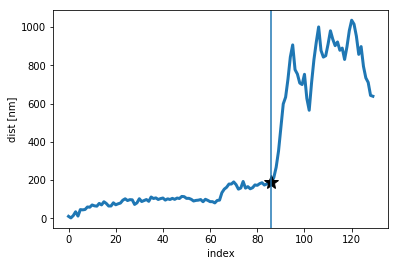

inflectionPoint Frame: 164
inflectionPoint Time[s]: 22.468000000000004
inflectionPoint Intensity: 15.3791


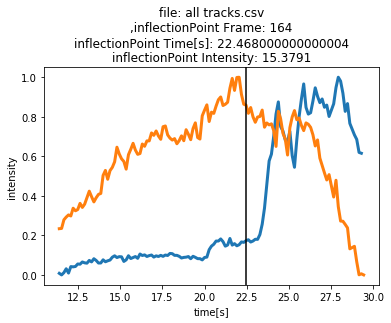

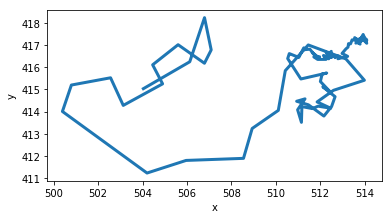

96
            Trajectory  Frame          x          y  z        m0       m1  \
5    46688        1084    197  514.07251  417.22501  0   6.25953  2.14004   
6    46689        1084    198  514.02087  417.24515  0   6.73110  2.27301   
7    46690        1084    199  514.09741  417.21268  0   6.47768  2.11612   
8    46691        1084    200  514.05243  417.27768  0   7.48474  2.17485   
9    46692        1084    201  513.80756  417.27908  0   7.36740  2.28970   
10   46693        1084    202  513.80212  417.14584  0   7.88981  2.24210   
11   46694        1084    203  513.98694  417.27396  0   8.66280  2.17273   
12   46695        1084    204  513.86841  417.34839  0   9.28763  2.20882   
13   46696        1084    205  513.60498  417.08426  0   9.49290  2.16022   
14   46697        1084    206  514.00012  417.31866  0  10.88495  2.15958   
15   46698        1084    207  513.71027  417.08084  0   9.25458  2.27116   
16   46699        1084    208  513.93427  417.47501  0  11.04734  2.23351

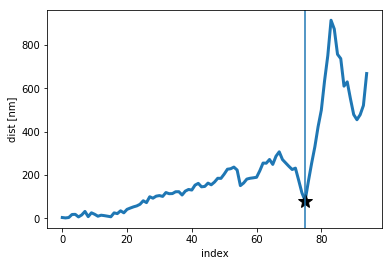

inflectionPoint Frame: 267
inflectionPoint Time[s]: 36.579
inflectionPoint Intensity: 18.74405


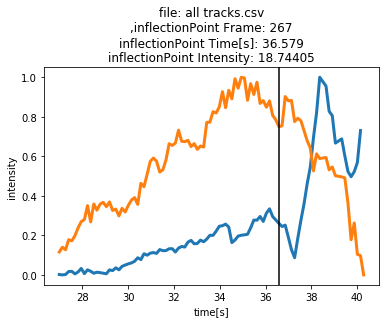

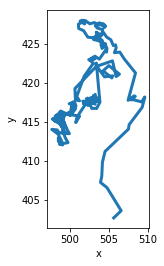

258
            Trajectory  Frame          x          y  z        m0       m1  \
5    23015         447     65  498.13480  415.74002  0   3.71035  2.25061   
6    23016         447     66  498.67670  415.32504  0   3.51062  2.37562   
7    23017         447     67  497.82138  415.36331  0   4.59184  2.25680   
8    23018         447     68  498.50882  415.48227  0   3.78526  2.35596   
9    23019         447     69  498.67374  415.83383  0   4.36330  2.08554   
10   23020         447     70  498.78922  415.76080  0   4.04452  2.33304   
11   23021         447     71  498.97150  415.66730  0   3.59661  2.34257   
12   23022         447     72  498.28061  415.87103  0   3.94062  2.12120   
13   23023         447     73  498.62509  415.36279  0   3.91911  2.13246   
14   23024         447     74  498.53290  415.66602  0   4.69586  2.17388   
15   23025         447     75  498.82925  415.58340  0   5.14757  2.17368   
16   23026         447     76  498.83548  415.68097  0   4.38187  2.3937

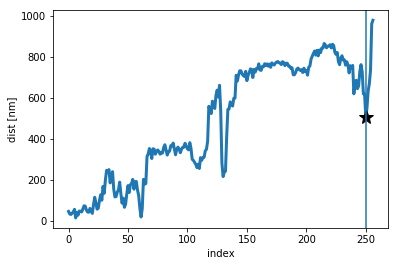

inflectionPoint Frame: 316
inflectionPoint Time[s]: 43.292
inflectionPoint Intensity: 6.95985


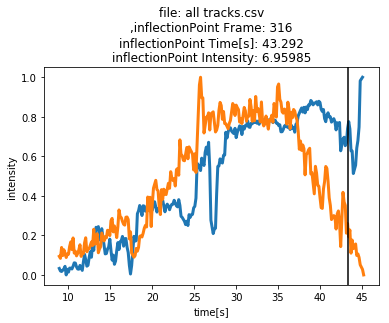

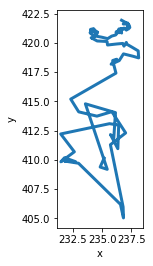

125
            Trajectory  Frame          x          y  z        m0       m1  \
5    10810         164      5  236.65993  421.93961  0   8.14935  2.18462   
6    10811         164      6  237.03108  421.73575  0   8.12139  2.18916   
7    10812         164      7  236.80403  421.61856  0   9.20200  2.16424   
8    10813         164      8  237.11792  421.64917  0   8.95348  2.24212   
9    10814         164      9  237.04170  421.66486  0   9.81394  2.19606   
10   10815         164     10  237.17326  421.70905  0  10.35813  2.19444   
11   10816         164     11  237.20863  421.65549  0  10.55583  2.13744   
12   10817         164     12  237.09271  421.59354  0  11.24854  2.20122   
13   10818         164     13  237.23921  421.51794  0  11.48566  2.17086   
14   10819         164     14  237.21773  421.40036  0  12.92738  2.19181   
15   10820         164     15  237.23184  421.44662  0  12.86450  2.21313   
16   10821         164     16  237.25673  421.58563  0  13.15674  2.2172

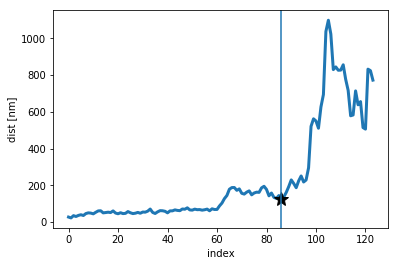

inflectionPoint Frame: 86
inflectionPoint Time[s]: 11.782
inflectionPoint Intensity: 16.21804


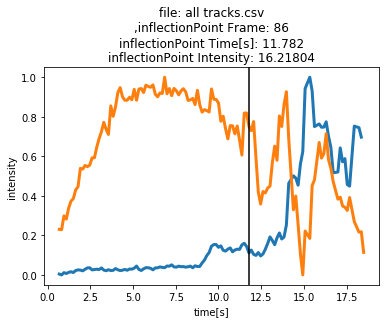

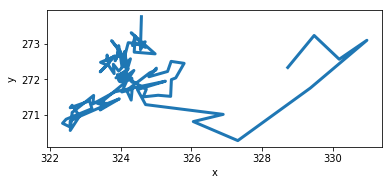

108
            Trajectory  Frame          x          y  z        m0       m1  \
5    82459        2277    394  324.58688  273.77502  0   3.75169  2.17768   
6    82460        2277    395  324.55917  272.84024  0   4.04494  2.01154   
7    82461        2277    396  324.69376  273.06406  0   4.37543  1.91950   
8    82462        2277    397  324.33469  272.95642  0   4.69574  2.15608   
9    82463        2277    398  324.41135  273.22617  0   4.60656  2.16435   
10   82464        2277    399  324.38229  272.77155  0   5.17709  2.13810   
11   82465        2277    400  324.97504  272.72336  0   3.90541  2.12679   
12   82466        2277    401  324.29706  273.32120  0   5.10969  2.23585   
13   82467        2277    402  324.70468  272.90619  0   5.54002  2.08391   
14   82468        2277    403  324.42654  273.01672  0   5.19052  2.07687   
15   82469        2277    404  324.21475  273.03964  0   6.20892  2.09860   
16   82470        2277    405  324.03708  272.36386  0   5.05796  2.1362

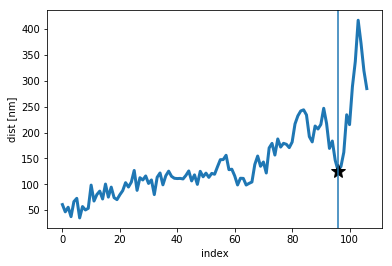

inflectionPoint Frame: 485
inflectionPoint Time[s]: 66.44500000000001
inflectionPoint Intensity: 11.49383


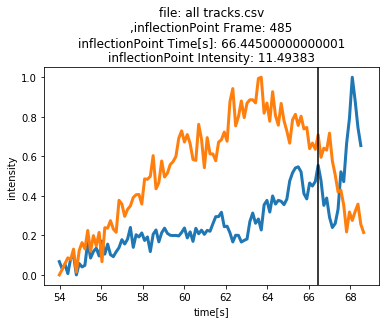

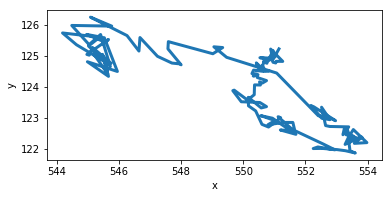

142
            Trajectory  Frame          x          y  z        m0       m1  \
5    33770         718    124  551.14789  125.22443  0   4.36723  2.15414   
6    33771         718    125  550.95581  124.88210  0   5.90688  2.20445   
7    33772         718    126  550.88019  125.21784  0   7.03050  2.19623   
8    33773         718    127  551.27026  124.82143  0   7.14409  2.16656   
9    33774         718    128  551.05505  124.82500  0   8.03183  2.21793   
10   33775         718    129  551.04303  124.77099  0   8.43624  2.22771   
11   33776         718    130  550.95752  124.79366  0   8.67409  2.11624   
12   33777         718    131  550.90002  124.92081  0   8.44979  2.23792   
13   33778         718    132  550.95911  125.16667  0   8.74359  2.23112   
14   33779         718    133  550.79272  124.83276  0   9.43559  2.25579   
15   33780         718    134  551.03406  124.98538  0   9.09827  2.24504   
16   33781         718    135  550.92078  124.92490  0   9.33868  2.2060

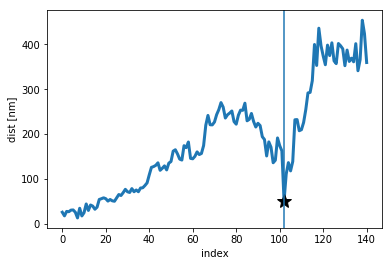

inflectionPoint Frame: 221
inflectionPoint Time[s]: 30.277
inflectionPoint Intensity: 16.444570000000002


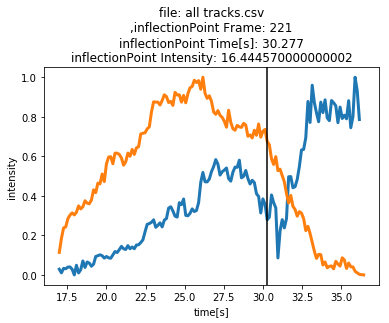

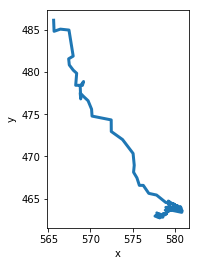

110
            Trajectory  Frame          x          y  z        m0       m1  \
5    36383         780    135  578.00464  462.80399  0   4.82606  2.29324   
6    36384         780    136  577.88007  463.30145  0   5.88933  2.16873   
7    36385         780    137  578.12726  463.11209  0   5.24340  2.37385   
8    36386         780    138  578.10663  463.05164  0   6.30525  2.44911   
9    36387         780    139  577.91882  462.99088  0   6.99035  2.35267   
10   36388         780    140  577.65991  462.91531  0   6.44512  2.27771   
11   36389         780    141  578.17651  463.06467  0   8.22601  2.31712   
12   36390         780    142  578.20935  462.70422  0   7.76555  2.35405   
13   36391         780    143  578.33600  462.96365  0   7.22250  2.38472   
14   36392         780    144  578.19257  463.19308  0   7.67560  2.27293   
15   36393         780    145  578.14014  462.90793  0   8.43087  2.29257   
16   36394         780    146  578.39380  463.05615  0   9.88515  2.2462

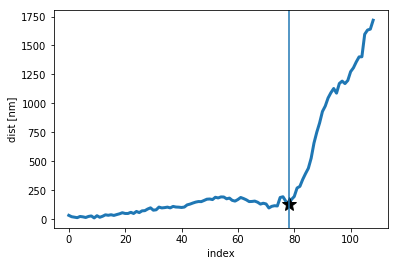

inflectionPoint Frame: 208
inflectionPoint Time[s]: 28.496000000000002
inflectionPoint Intensity: 14.77339


In [ ]:
for trajectoryID in goodTrajectoryIDs:
    
    data = alldata[alldata['Trajectory']==trajectoryID]
    
    data = data.reset_index(drop=True)
    data = data[excludeTheFirstNFrames:]

    
        
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    
    
    # calc distances from start

    
    time = frameToSecondConversion*data['Frame']
    distancesFromStart = []
    for i in range(1,len(data)):
        v0 = np.array([x[0],y[0]])
        v1 = np.array([x[i],y[i]])
        dist = np.linalg.norm(v0-v1)
        distancesFromStart.append(dist)
    distancesFromStart = pixelToNanometerConversion* np.array(distancesFromStart)
    
    # plot xy
    
    plt.plot(x,y,lw=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(outputpath+file+'_'+str(trajectoryID)+'_traj_xy.png')
    plt.show()
    
    
    # find inflection point from distances 
    
    x=np.arange(0,len(distancesFromStart))
    y=distancesFromStart
    
    
    print(len(data))
    print(data)
    inflectionPointIndex = ytf.findInflectionPoint(x,y)
    print("inflectionPointIndex: {}".format(inflectionPointIndex))
    print("inflectionPoint Frame: {}".format(data['Frame'][inflectionPointIndex]))
    print("inflectionPoint Intensity: {}".format(data['m0'][inflectionPointIndex]))
    
    
    #plt.plot(x, newy, 'o', label='original data',color='b')
    plt.plot(distancesFromStart,lw=3)
    plt.plot(x[inflectionPointIndex],y[inflectionPointIndex], 'k*',markersize=15)
    plt.axvline(x[inflectionPointIndex])
    
    plt.xlabel('index')
    plt.ylabel('dist [nm]')
    plt.savefig(outputpath+file+'_'+str(trajectoryID)+'_inflectionPoint.png')
    plt.show()
    
    
    # plot dista and intensity at the same time:
    
    plt.plot(time[0:-1],(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart)),lw=3)
    #plt.title('distance from start')
    plt.xlabel('time [s]')
    plt.ylabel('dist [nm]')
    #plt.savefig(file+'_distToStart.png')
    
    
    plt.plot(time,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=3)
    plt.xlabel('time[s]')
    plt.ylabel('intensity')
    
    plt.axvline(time[0:-1][inflectionPointIndex],c='k')
    inflectionPointFrame = data['Frame'][inflectionPointIndex]
    inflectionPointTime = frameToSecondConversion*(data['Frame'][inflectionPointIndex])
    inflexctionPointIntensity = data['m0'][inflectionPointIndex]
    
    print("inflectionPoint Frame: {}".format(inflectionPointFrame))
    print("inflectionPoint Time[s]: {}".format(inflectionPointTime))
    print("inflectionPoint Intensity: {}".format(inflexctionPointIntensity))
    
    plt.title("file: {}\n,inflectionPoint Frame: {}\ninflectionPoint Time[s]: {}\ninflectionPoint Intensity: {}".format(file,inflectionPointFrame,inflectionPointTime,inflexctionPointIntensity))
    
    plt.savefig(outputpath+file+'_'+str(trajectoryID)+'_intensity+distance.png')
    plt.show()
    
    
    # export as excels
    
    data['time[s]']=time
    data['time aligned [s]']=time-inflectionPointTime
    distanceForExport = np.concatenate((np.array([0]),distancesFromStart))
    data['distance']=distanceForExport
    normDistanceForExport = np.concatenate((np.array([0]),(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart))))
    data['distance normalized']= normDistanceForExport
    data.to_csv(outputpath+file+'_'+str(trajectoryID)+'_processed.csv')
    data